# Import Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load the dataset using pandas
data = pd.read_csv("VOW3.DE_max.csv")

In [12]:
data = data.tail(120)

# Polynomial Regression Analysis

## Imports

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
import time
import datetime

## Loading Data into np array

In [14]:
stocks_X = []
stocks_Y = []

for index, row in data.iterrows():
    element = datetime.datetime.strptime(row['Date'],"%Y-%m-%d")
    timestamp = datetime.datetime.timestamp(element)
    stocks_X.append(timestamp)
    stocks_Y.append(row['Close'])

stocks_X = np.array(stocks_X)
stocks_Y = np.array(stocks_Y)

stocks_X_train = stocks_X[:-30]
stocks_X_test = stocks_X[-30:]

stocks_Y_train = stocks_Y[:-30]
stocks_Y_test = stocks_Y[-30:]

## Regression

Automatically created module for IPython interactive environment


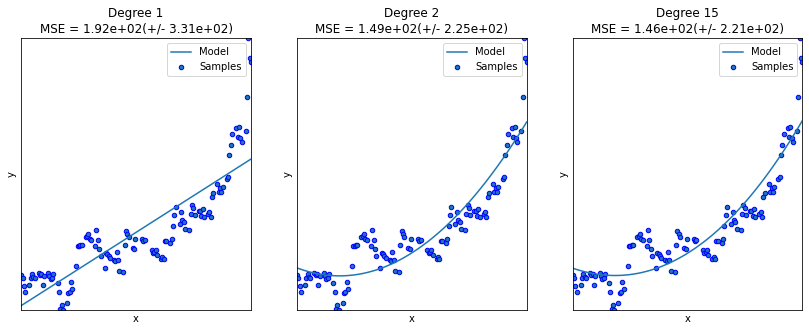

In [15]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

#n_samples = 30
degrees = [1, 2, 15]

#X = np.sort(np.random.rand(n_samples))

#y = true_fun(X) + np.random.randn(n_samples) * 0.1
X = stocks_X
y = stocks_Y
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(stocks_X, pipeline.predict(stocks_X[:, np.newaxis]), label="Model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(min(X),max(X))
    plt.ylim(min(y),max(y))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## Plot